# Prediction of Patient death and survival with Logistic Regression

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Desktop/widsdatathon/training_v2.csv")

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,1,28715,79,0,54.0,30.092593,0,Caucasian,M,180.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,3,73183,204,0,82.0,21.204776,0,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
2,4,38008,19,0,80.0,24.391059,0,Caucasian,M,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
3,6,69614,176,0,54.0,36.320312,0,Caucasian,F,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,9,86066,116,0,68.0,23.422269,0,Hispanic,F,152.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic


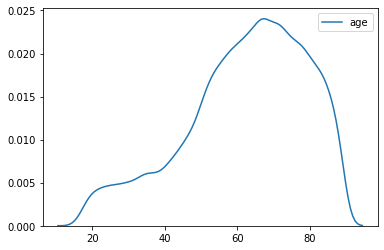

In [8]:
sns.kdeplot(df.age)

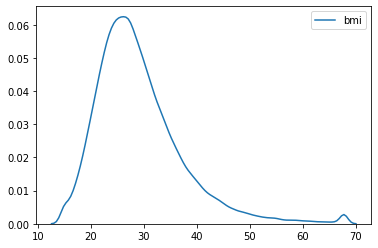

In [9]:
sns.kdeplot(df.bmi)

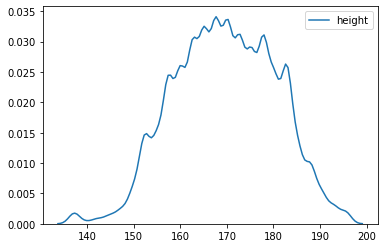

In [10]:
sns.kdeplot(df.height)

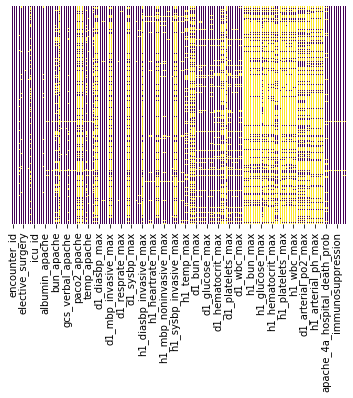

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Visualizing Class Imbalance

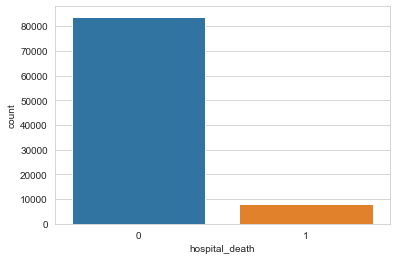

In [5]:
sns.set_style('whitegrid')
sns.countplot(x = 'hospital_death', data = df)

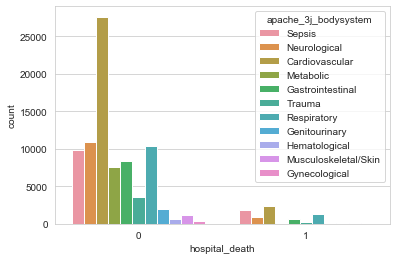

In [6]:
sns.countplot(x = 'hospital_death', data = df, hue = 'apache_3j_bodysystem')

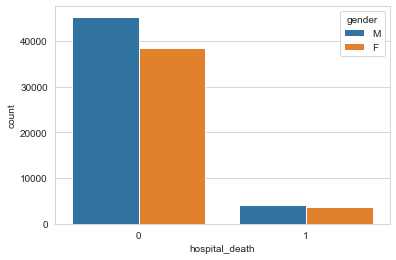

In [7]:
sns.countplot(x = 'hospital_death', data = df, hue = 'gender')

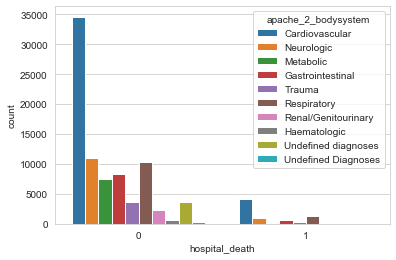

In [8]:
sns.countplot(x = 'hospital_death', data = df, hue = 'apache_2_bodysystem')

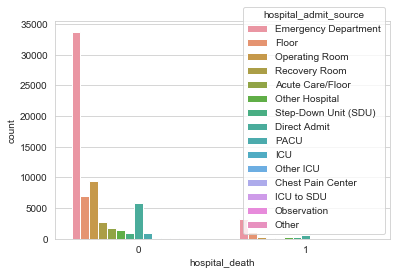

In [9]:
sns.countplot(x = 'hospital_death', data = df, hue = 'hospital_admit_source')

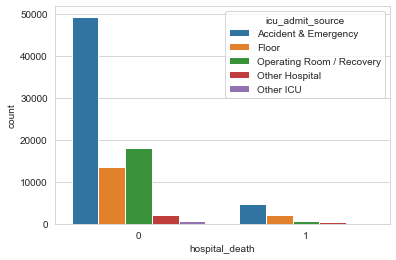

In [10]:
sns.countplot(x = 'hospital_death', data = df, hue = 'icu_admit_source')

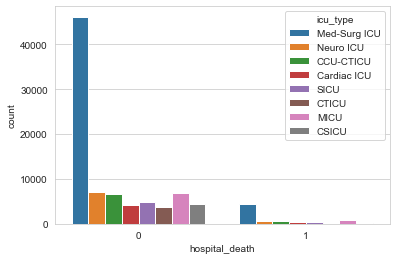

In [11]:
sns.countplot(x = 'hospital_death', data = df, hue = 'icu_type')

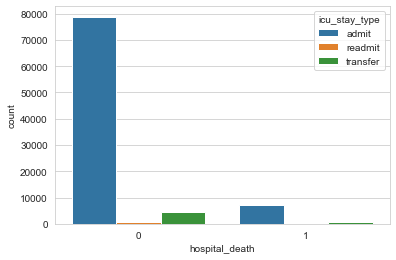

In [12]:
sns.countplot(x = 'hospital_death', data = df, hue = 'icu_stay_type')

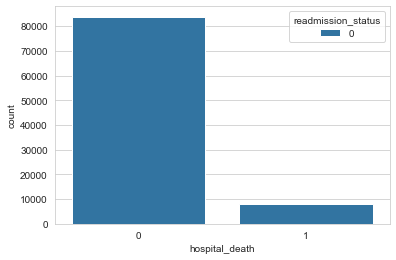

In [13]:
sns.countplot(x = 'hospital_death', data = df, hue = 'readmission_status')

In [14]:
df.drop(['readmission_status'], axis=1, inplace = True)

In [15]:
number = LabelEncoder()
df['gender'] = number.fit_transform(df['gender'].astype(str))

In [16]:
number = LabelEncoder()
df['apache_3j_bodysystem'] = number.fit_transform(df['apache_3j_bodysystem'].astype(str))

In [17]:
number = LabelEncoder()
df['apache_2_bodysystem'] = number.fit_transform(df['apache_2_bodysystem'].astype(str))

In [18]:
number = LabelEncoder()
df['icu_admit_source'] = number.fit_transform(df['icu_admit_source'].astype(str))

In [19]:
number = LabelEncoder()
df['ethnicity'] = number.fit_transform(df['ethnicity'].astype(str))

In [20]:
number = LabelEncoder()
df['icu_admit_source'] = number.fit_transform(df['icu_admit_source'].astype(str))

In [21]:
number = LabelEncoder()
df['icu_type'] = number.fit_transform(df['icu_type'].astype(str))

In [22]:
number = LabelEncoder()
df['hospital_admit_source'] = number.fit_transform(df['hospital_admit_source'].astype(str))

In [23]:
number = LabelEncoder()
df['icu_stay_type'] = number.fit_transform(df['icu_stay_type'].astype(str))

In [24]:
df.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,1,28715,79,0,54.0,30.092593,0,2,1,180.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,3,73183,204,0,82.0,21.204776,0,2,0,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
2,4,38008,19,0,80.0,24.391059,0,2,1,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
3,6,69614,176,0,54.0,36.320312,0,2,0,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,9,86066,116,0,68.0,23.422269,0,3,0,152.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
5,11,29765,99,0,76.0,26.263941,0,2,0,152.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
6,12,21112,118,0,72.0,32.443771,0,2,1,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,13,40323,81,0,52.0,27.900747,0,2,1,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
8,14,77382,49,0,49.0,25.409060,1,2,1,180.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
9,15,71614,79,0,74.0,22.968750,0,2,0,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,10


In [25]:
df.drop(['patient_id'], axis=1, inplace = True)
df.drop(['hospital_id'], axis=1, inplace = True)

In [26]:
df.drop(['icu_id'], axis=1, inplace = True)

In [27]:
df.drop(['d1_diasbp_noninvasive_max'], axis=1, inplace = True)

In [28]:
df.drop(['d1_temp_max'], axis=1, inplace = True)

In [29]:
df.drop(['h1_sodium_max'], axis=1, inplace = True)

In [30]:
df.drop(['h1_sodium_min'], axis=1, inplace = True)

In [31]:
df.drop(['d1_arterial_ph_min'], axis=1, inplace = True)

In [32]:
df.drop(['h1_arterial_ph_min'], axis=1, inplace = True)

In [33]:
df.drop(['h1_calcium_max'], axis=1, inplace = True)

In [34]:
df.drop(['gcs_motor_apache'], axis=1, inplace = True)

In [35]:
df.drop(['d1_mbp_noninvasive_min'], axis=1, inplace = True)

In [36]:
df.drop(['heart_rate_apache'], axis=1, inplace = True)

In [37]:
df.drop(['apache_4a_hospital_death_prob'], axis=1, inplace = True)

In [38]:
df.head()

,encounter_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,1,0,54.0,30.092593,0,2,1,180.0,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,3,0,82.0,21.204776,0,2,0,165.1,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
2,4,0,80.0,24.391059,0,2,1,173.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
3,6,0,54.0,36.320312,0,2,0,160.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,9,0,68.0,23.422269,0,3,0,152.4,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3


In [39]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

# Percentage of Deaths and No Deaths

In [40]:
count_no_death = len(df[df['hospital_death']==0])
count_death = len(df[df['hospital_death']==1])
pct_of_no_death = count_no_death/(count_no_death+count_death)
print("percentage of NO Death is", pct_of_no_death*100)
pct_of_death = count_death/(count_no_death+count_death)
print("percentage of Death", pct_of_death*100)

percentage of NO Death is 91.36981671082617
percentage of Death 8.630183289173836


In [41]:
df.shape

(91713, 171)

In [42]:
pd.set_option('display.max_columns', None)

# Checking  missing values

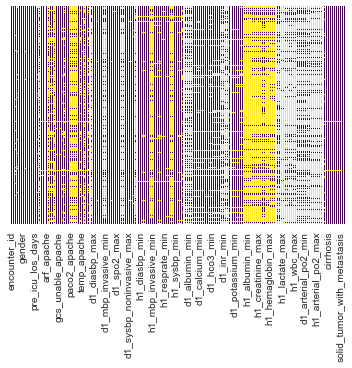

In [43]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [44]:
df.head()

,encounter_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,1,0,54.0,30.092593,0,2,1,180.0,3,0,0,5,0.531944,97.50,2.3,113.0,501.01,0,0.0,1.9,21.0,0.93,NaN,4.0,0.0,5.0,205.0,38.2,0.0,118.0,NaN,NaN,NaN,NaN,31.0,129.0,36.50,619.9200,0.0,11.90,NaN,NaN,115.0,62.0,62.0,113.0,79.0,NaN,NaN,118.0,74.0,118.0,31.0,16.0,100.0,87.0,NaN,NaN,130.0,101.0,130.0,101.0,36.50,NaN,NaN,67.0,67.0,67.0,67.0,113.0,113.0,NaN,NaN,76.0,75.0,76.0,75.0,24.0,24.0,94.0,94.0,NaN,NaN,102.0,102.0,102.0,102.0,36.8,36.8,2.3,2.3,1.9,1.9,21.0,21.0,7.2,7.2,0.93,0.93,255.0,114.0,16.0,16.0,13.5,13.5,38.2,38.2,1.3,1.3,3.7,1.9,148.0,148.0,3.7,3.7,129.0,129.0,11.90,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,255.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,3,0,82.0,21.204776,0,2,0,165.1,15,0,0,6,0.068750,57.80,3.4,301.0,403.01,0,0.0,0.5,16.0,1.10,NaN,4.0,0.0,1.0,102.0,33.1,0.0,130.0,NaN,NaN,NaN,NaN,10.0,138.0,36.70,NaN,0.0,10.40,NaN,NaN,96.0,40.0,40.0,109.0,63.0,NaN,NaN,130.0,57.0,130.0,24.0,11.0,100.0,96.0,NaN,NaN,189.0,73.0,189.0,73.0,36.70,NaN,NaN,96.0,66.0,96.0,66.0,104.0,100.0,NaN,NaN,112.0,112.0,112.0,112.0,18.0,18.0,100.0,98.0,NaN,NaN,168.0,139.0,168.0,139.0,36.7,36.7,3.4,3.4,0.5,0.5,16.0,16.0,

In [45]:
data = df.dropna(thresh=df.shape[0]*0.50,how='all',axis=1)

In [46]:
data.shape

(91713, 102)

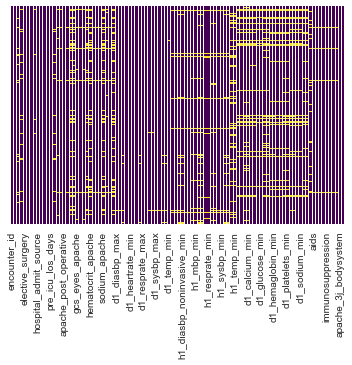

In [47]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [48]:
data.head()

,encounter_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,1,0,54.0,30.092593,0,2,1,180.0,3,0,0,5,0.531944,97.50,113.0,501.01,0,0.0,21.0,0.93,4.0,0.0,5.0,205.0,38.2,0.0,118.0,31.0,129.0,36.50,0.0,11.90,115.0,62.0,62.0,113.0,79.0,118.0,74.0,118.0,31.0,16.0,100.0,87.0,130.0,101.0,130.0,101.0,36.50,67.0,67.0,67.0,67.0,113.0,113.0,76.0,75.0,76.0,75.0,24.0,24.0,94.0,94.0,102.0,102.0,102.0,102.0,36.8,36.8,21.0,21.0,7.2,7.2,0.93,0.93,255.0,114.0,16.0,16.0,13.5,13.5,38.2,38.2,148.0,148.0,3.7,3.7,129.0,129.0,11.90,11.90,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,3,0,82.0,21.204776,0,2,0,165.1,15,0,0,6,0.068750,57.80,301.0,403.01,0,0.0,16.0,1.10,4.0,0.0,1.0,102.0,33.1,0.0,130.0,10.0,138.0,36.70,0.0,10.40,96.0,40.0,40.0,109.0,63.0,130.0,57.0,130.0,24.0,11.0,100.0,96.0,189.0,73.0,189.0,73.0,36.70,96.0,66.0,96.0,66.0,104.0,100.0,112.0,112.0,112.0,112.0,18.0,18.0,100.0,98.0,168.0,139.0,168.0,139.0,36.7,36.7,16.0,16.0,9.0,9.0,1.10,1.10,124.0,102.0,23.0,23.0,10.6,10.6,33.1,33.1,488.0,488.0,4.3,4.3,138.0,138.0,10.40,10.40,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
2,4,0,80.0,24.391059,0,2,1,173.0,4,1,0,6,0.174306,73.00,301.0,403.01,0,0.0,16.0,0.80,3.0,0.0,4.0,248.0,39.8,0.0,63.0,46.0,138.0,36.77,0.0,14.88,90.0,42.0,42.0,98.0,66.0,107.0,63.0,107.0,39.0,15.0,95.0,93.0,161.0,120.0,161.0,120.0,36.77,90.0,51.0,90.0,51.0,98.0,94.0,107.0,72.0,107.0,72.0,27.0,25.0,95.0,95.0,161.0,143.0,161.0,143.0,NaN,NaN,16.0,16.0,NaN,NaN,0.80,0.80,248.0,129.0,23.0,23.0,13.5,13.5,39.8,39.8,248.0,248.0,3.6,3.6,138.0,138.0,14.88,14.88,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
3,6,0,54.0,36.320312,0,2,0,160.0,3,0,0,0,0.139583,92.98,112.0,107.01,0,0.0,11.0,0.52,4.0,0.0,5.0,116.0,38.7,0.0,121.0,10.0,130.0,35.70,0.0,17.84,113.0,72.0,72.0,70.0,45.0,121.0,86.0,121.0,21.0,10.0,99.0,94.0,174.0,129.0,174.0,129.0,35.80,87.0,75.0,87.0,75.0,53.0,45.0,114.0,91.0,114.0,91.0,17.0,13.0,98.0,95.0,139.0,129.0,139.0,129.0,36.1,36.1,11.0,11.0,9.1,9.1,0.68,0.68,132.0,116.0,28.0,28.0,13.4,13.2,39.6,38.7,229.0,213.0,3.4,2.9,134.0,134.0,12.74,12.74,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,9,0,68.0,23.422269,0,3,0,152.4,3,0,0,3,0.125000,54.40,307.0,704.01,0,0.0,8.0,0.30,4.0,0.0,5.0,63.0,27.9,0.0,55.0,12.0,117.0,36.10,0.0,2.80,97.0,52.0,52.0,94.0,73.0,102.0,55.0,102.0,20.0,12.0,100.0,98.0,137.0,80.0,137.0,80.0,36.50,74.0,74.0,74.0,74.0,96.0,86.0,90.0,90.0,90.0,90.0,16.0,14.0,100.0,98.0,148.0,148.0,148.0,148.0,NaN,NaN,8.0,7.0,8.1,7.3,0.34,0.30,73.0,63.0,19.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,4.7,4.1,123.0,117.0,Na

In [49]:
data.groupby('hospital_death').mean()

,encounter_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
hospital_death,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,65666.975501,61.748741,29.264902,0.194873,2.041159,0.540908,169.706029,7.029356,0.705387,0.112175,4.278670,0.787357,84.323088,187.779488,571.101236,0.211413,0.026597,24.650998,1.425413,3.540316,0.007987,4.109004,158.457067,33.122556,0.132190,88.537985,25.409111,137.944499,36.454504,0.292841,11.844569,88.480278,50.895379,50.978773,101.898629,70.340707,104.758393,65.812145,104.693504,28.543974,12.806358,99.246507,91.101515,148.555838,98.257894,148.447037,98.327322,36.315453,75.536310,63.467755,76.009673,63.944941,91.465363,83.119277,92.003723,80.235894,92.003852,80.600383,22.351241,17.004324,98.091454,95.395144,133.831324,117.558048,133.641036,117.785017,36.734509,36.636379,24.505995,22.714202,8.396273,8.211138,1.435031,1.323246,172.458791,114.028437,24.538066,23.423329,11.482210,10.949519,34.600482,33.096148,207.940823,198.342091,4.228471,3.93018,139.041103,137.732846,12.174465,11.090473,0.024799,0.000818,0.014188,0.227215,0.011639,0.024012,0.006301,0.003763,0.018409,4.305198,2.692439
1,64961.356412,68.494156,28.340398,0.065824,2.050790,0.529627,168.952094,6.537461,0.631333,0.138977,4.374732,1.348287,80.904978,160.254274,421.149669,0.091977,0.042656,37.805226,2.040941,2.649222,0.025937,2.756657,179.781100,31.605162,0.353384,82.458478,30.075834,138.188919,35.977758,0.674968,15.121003,88.614916,42.371512,42.427492,114.679164,70.121976,103.516358,54.902993,103.499229,32.475604,13.269632,99.192244,83.587921,146.046423,82.766362,145.990393,82.831494,35.761698,73.438098,56.201363,73.701007,56.303828,100.276171,89.399403,87.507664,70.618790,87.398939,70.585691,25.607181,19.393479,97.548130,92.832273,127.092350,103.758187,126.996105,103.784688,36.453930,36.295565,38.045852,34.802428,8.196450,7.848503,2.054252,1.827927,197.580784,118.092056,22.585417,20.545634,11.092909,10.244002,33.812527,31.436144,198.359132,180.302910,4.495199,3.98184,139.989764,137.610516,15.643295,13.653995,0.242726,0.001277,0.031673,0.203704,0.027331,0.049042,0.015198,0.008046,0.044317,5.034239,2.193683


In [50]:
data.isna().sum()

encounter_id                      0
hospital_death                    0
age                            4228
bmi                            3429
elective_surgery                  0
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem              0
apache_2_bodysystem               0
Length: 102, dtype: int64

In [51]:
dataset= data.fillna(data.mean())

In [52]:
dataset.head()

,encounter_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,1,0,54.0,30.092593,0,2,1,180.0,3,0,0,5,0.531944,97.50,113.0,501.01,0,0.0,21.0,0.93,4.0,0.0,5.0,205.0,38.2,0.0,118.0,31.0,129.0,36.50,0.0,11.90,115.0,62.0,62.0,113.0,79.0,118.0,74.0,118.0,31.0,16.0,100.0,87.0,130.0,101.0,130.0,101.0,36.50,67.0,67.0,67.0,67.0,113.0,113.0,76.0,75.0,76.0,75.0,24.0,24.0,94.0,94.0,102.0,102.0,102.0,102.0,36.800000,36.800000,21.0,21.0,7.200000,7.200000,0.93,0.93,255.0,114.0,16.0,16.0,13.500000,13.500000,38.20000,38.200000,148.000000,148.000000,3.7,3.7,129.0,129.0,11.900000,11.900000,0.043955,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,3,0,82.0,21.204776,0,2,0,165.1,15,0,0,6,0.068750,57.80,301.0,403.01,0,0.0,16.0,1.10,4.0,0.0,1.0,102.0,33.1,0.0,130.0,10.0,138.0,36.70,0.0,10.40,96.0,40.0,40.0,109.0,63.0,130.0,57.0,130.0,24.0,11.0,100.0,96.0,189.0,73.0,189.0,73.0,36.70,96.0,66.0,96.0,66.0,104.0,100.0,112.0,112.0,112.0,112.0,18.0,18.0,100.0,98.0,168.0,139.0,168.0,139.0,36.700000,36.700000,16.0,16.0,9.000000,9.000000,1.10,1.10,124.0,102.0,23.0,23.0,10.600000,10.600000,33.10000,33.100000,488.000000,488.000000,4.3,4.3,138.0,138.0,10.400000,10.400000,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
2,4,0,80.0,24.391059,0,2,1,173.0,4,1,0,6,0.174306,73.00,301.0,403.01,0,0.0,16.0,0.80,3.0,0.0,4.0,248.0,39.8,0.0,63.0,46.0,138.0,36.77,0.0,14.88,90.0,42.0,42.0,98.0,66.0,107.0,63.0,107.0,39.0,15.0,95.0,93.0,161.0,120.0,161.0,120.0,36.77,90.0,51.0,90.0,51.0,98.0,94.0,107.0,72.0,107.0,72.0,27.0,25.0,95.0,95.0,161.0,143.0,161.0,143.0,36.710858,36.607651,16.0,16.0,8.378881,8.179575,0.80,0.80,248.0,129.0,23.0,23.0,13.500000,13.500000,39.80000,39.800000,248.000000,248.000000,3.6,3.6,138.0,138.0,14.880000,14.880000,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
3,6,0,54.0,36.320312,0,2,0,160.0,3,0,0,0,0.139583,92.98,112.0,107.01,0,0.0,11.0,0.52,4.0,0.0,5.0,116.0,38.7,0.0,121.0,10.0,130.0,35.70,0.0,17.84,113.0,72.0,72.0,70.0,45.0,121.0,86.0,121.0,21.0,10.0,99.0,94.0,174.0,129.0,174.0,129.0,35.80,87.0,75.0,87.0,75.0,53.0,45.0,114.0,91.0,114.0,91.0,17.0,13.0,98.0,95.0,139.0,129.0,139.0,129.0,36.100000,36.100000,11.0,11.0,9.100000,9.100000,0.68,0.68,132.0,116.0,28.0,28.0,13.400000,13.200000,39.60000,38.700000,229.000000,213.000000,3.4,2.9,134.0,134.0,12.740000,12.740000,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,9,0,68.0,23.422269,0,3,0,152.4,3,0,0,3,0.125000,54.40,307.0,704.01,0,0.0,8.0,0.30,4.0,0.0,5.0,63.0,27.9,0.0,55.0,12.0,117.0,36.10,0.0,2.80,97.0,52.0,52.0,94.0,73.0,102.0,55.0,102

In [53]:
dataset.isna().sum()

encounter_id                   0
hospital_death                 0
age                            0
bmi                            0
elective_surgery               0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 102, dtype: int64

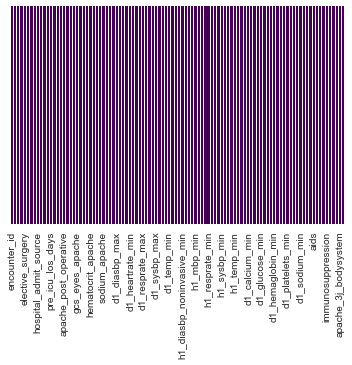

In [54]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [57]:
dataset.head()

,encounter_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,1,0,54.0,30.092593,0,2,1,180.0,3,0,0,5,0.531944,97.50,113.0,501.01,0,0.0,21.0,0.93,4.0,0.0,5.0,205.0,38.2,0.0,118.0,31.0,129.0,36.50,0.0,11.90,115.0,62.0,62.0,113.0,79.0,118.0,74.0,118.0,31.0,16.0,100.0,87.0,130.0,101.0,130.0,101.0,36.50,67.0,67.0,67.0,67.0,113.0,113.0,76.0,75.0,76.0,75.0,24.0,24.0,94.0,94.0,102.0,102.0,102.0,102.0,36.800000,36.800000,21.0,21.0,7.200000,7.200000,0.93,0.93,255.0,114.0,16.0,16.0,13.500000,13.500000,38.20000,38.200000,148.000000,148.000000,3.7,3.7,129.0,129.0,11.900000,11.900000,0.043955,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,3,0,82.0,21.204776,0,2,0,165.1,15,0,0,6,0.068750,57.80,301.0,403.01,0,0.0,16.0,1.10,4.0,0.0,1.0,102.0,33.1,0.0,130.0,10.0,138.0,36.70,0.0,10.40,96.0,40.0,40.0,109.0,63.0,130.0,57.0,130.0,24.0,11.0,100.0,96.0,189.0,73.0,189.0,73.0,36.70,96.0,66.0,96.0,66.0,104.0,100.0,112.0,112.0,112.0,112.0,18.0,18.0,100.0,98.0,168.0,139.0,168.0,139.0,36.700000,36.700000,16.0,16.0,9.000000,9.000000,1.10,1.10,124.0,102.0,23.0,23.0,10.600000,10.600000,33.10000,33.100000,488.000000,488.000000,4.3,4.3,138.0,138.0,10.400000,10.400000,0.150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
2,4,0,80.0,24.391059,0,2,1,173.0,4,1,0,6,0.174306,73.00,301.0,403.01,0,0.0,16.0,0.80,3.0,0.0,4.0,248.0,39.8,0.0,63.0,46.0,138.0,36.77,0.0,14.88,90.0,42.0,42.0,98.0,66.0,107.0,63.0,107.0,39.0,15.0,95.0,93.0,161.0,120.0,161.0,120.0,36.77,90.0,51.0,90.0,51.0,98.0,94.0,107.0,72.0,107.0,72.0,27.0,25.0,95.0,95.0,161.0,143.0,161.0,143.0,36.710858,36.607651,16.0,16.0,8.378881,8.179575,0.80,0.80,248.0,129.0,23.0,23.0,13.500000,13.500000,39.80000,39.800000,248.000000,248.000000,3.6,3.6,138.0,138.0,14.880000,14.880000,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4
3,6,0,54.0,36.320312,0,2,0,160.0,3,0,0,0,0.139583,92.98,112.0,107.01,0,0.0,11.0,0.52,4.0,0.0,5.0,116.0,38.7,0.0,121.0,10.0,130.0,35.70,0.0,17.84,113.0,72.0,72.0,70.0,45.0,121.0,86.0,121.0,21.0,10.0,99.0,94.0,174.0,129.0,174.0,129.0,35.80,87.0,75.0,87.0,75.0,53.0,45.0,114.0,91.0,114.0,91.0,17.0,13.0,98.0,95.0,139.0,129.0,139.0,129.0,36.100000,36.100000,11.0,11.0,9.100000,9.100000,0.68,0.68,132.0,116.0,28.0,28.0,13.400000,13.200000,39.60000,38.700000,229.000000,213.000000,3.4,2.9,134.0,134.0,12.740000,12.740000,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,9,0,68.0,23.422269,0,3,0,152.4,3,0,0,3,0.125000,54.40,307.0,704.01,0,0.0,8.0,0.30,4.0,0.0,5.0,63.0,27.9,0.0,55.0,12.0,117.0,36.10,0.0,2.80,97.0,52.0,52.0,94.0,73.0,102.0,55.0,102

# Logistic Regression

In [58]:
X = dataset.iloc[:, 2:100].values
Y = dataset.iloc[:, 1].values

In [59]:
dataset.shape

(91713, 102)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.42859,random_state=12)

In [76]:
sm = SMOTE(random_state=12,sampling_strategy ='minority')
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

In [77]:
from sklearn.linear_model import LogisticRegression
clf_rf = LogisticRegression(random_state=12)
clf_rf.fit(X_train_res, Y_train_res)

/Users/jumananadir/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
Y_pred = clf_rf.predict(X_test)

In [79]:
print(Y_pred)

[0 1 1 ... 0 0 0]


In [80]:
len(Y_pred)

39308

In [86]:
submission = pd.DataFrame({'encounter_id':Y_pred})

#Visualize the first 5 rows
submission.head()

,encounter_id
0,0
1,1
2,1
3,0
4,0


In [87]:
filename = 'Predictions 1.csv'

In [88]:
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Predictions 1.csv


In [67]:
print(X_train)

[[32.         22.41542945  1.         ...  0.          0.
   0.        ]
 [86.         23.42490644  0.         ...  0.          0.
   0.        ]
 [57.         31.31284114  1.         ...  0.          0.
   0.        ]
 ...
 [64.         29.18581767  0.         ...  0.          0.
   0.        ]
 [54.         27.1720649   1.         ...  0.          0.
   0.        ]
 [73.         61.65190803  0.         ...  0.          0.
   0.        ]]


In [68]:
len(X_train)

68784

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     20969
           1       0.23      0.75      0.35      1960

    accuracy                           0.77     22929
   macro avg       0.60      0.76      0.61     22929
weighted avg       0.91      0.77      0.82     22929



In [62]:
roc_auc_score(Y_test, Y_pred)

0.758068117561298

In [63]:
accuracy_score(Y_test, Y_pred)

0.7677177373631645

In [73]:
accuracy_score(Y_test, Y_pred)

0.9198831174495181

In [74]:
confusion_matrix(Y_test, Y_pred)

array([[20800,   177],
       [ 1660,   292]])